In [1]:
from collections import OrderedDict
from pathlib import Path
import yaml

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_learning_curves(datasets: OrderedDict, name: str):
    plt.figure(figsize=(10, 7))

    for _, path in datasets.items():
        df = pd.read_csv(path / "progress.csv")
        df = df[~df["return"].isna()]
        plt.plot(df["env_steps"], df["return"])

    plt.title(f"Learning Curve for {name}")
    plt.xlabel("env_steps")
    plt.ylabel("return")
    plt.legend(datasets.keys())
    plt.show()


def plot_loss_and_learning_curves(datasets: OrderedDict, name: str):
    n_items = len(datasets)
    c = 1

    plt.figure(figsize=(15, 10))

    for i, (name, path) in enumerate(datasets.items()):
        df = pd.read_csv(path / "progress.csv")
        with open(path / "flags.yml", "r") as f:
            cfg = yaml.load(f, Loader=yaml.SafeLoader)

        plt.subplot(n_items, 3, i + 1)
        c += 1
        plt.plot(
            df[~df["return"].isna()]["env_steps"], df[~df["return"].isna()]["return"]
        )
        plt.xlabel("env_steps")
        plt.ylabel("return")
        plt.title(f"Learning Curve for {name}")

        plt.subplot(n_items, 3, n_items + i + 1)
        c += 1
        plt.plot(
            df[~df["aux_loss"].isna()]["env_steps"],
            df[~df["aux_loss"].isna()]["r_dist"],
        )
        plt.plot(
            df[~df["aux_loss"].isna()]["env_steps"],
            cfg["bisim_gamma"] * df[~df["aux_loss"].isna()]["transition_dist"],
        )
        plt.xlabel("env_steps")
        plt.ylabel("bisim component")
        plt.title(f"Bisimulation Distance Components for {name}")
        plt.legend(["r_dist", "transition_dist"])

        plt.subplot(n_items, 3, 2 * n_items + i + 1)
        c += 1
        plt.plot(
            df[~df["aux_loss"].isna()]["env_steps"],
            df[~df["aux_loss"].isna()]["z_dist"],
        )
        plt.plot(
            df[~df["aux_loss"].isna()]["env_steps"],
            df[~df["aux_loss"].isna()]["bisimilarity"],
        )
        plt.xlabel("env_steps")
        plt.ylabel("loss component")
        plt.title(f"Bisimulation Loss Components for {name}")
        plt.legend(["z_dist", "bisimilarity"])

    plt.suptitle(f"Loss Components and Learning Curves for {name}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    plt.show()


def plot_encoder_signals(datasets: OrderedDict, name: str):
    n_items = len(datasets)
    plt.figure(figsize=(15, 10))

    for i, (dataset_name, dataset_path) in enumerate(datasets.items()):
        df = pd.read_csv(dataset_path / "progress.csv")
        df = df[~df["aux_loss"].isna()]

        plt.subplot(n_items, 3, i + 1)
        plt.plot(df["env_steps"], df["alm_loss"])
        plt.plot(df["env_steps"], df["aux_loss"])
        plt.xlabel("env_steps")
        plt.ylabel("loss")
        plt.title(f"Total Encoder Loss for {dataset_name}")
        plt.legend(["alm_loss", "aux_loss"])

        plt.subplot(n_items, 3, n_items + i + 1)
        plt.plot(df["env_steps"], df["bisim_critic_loss"])
        plt.xlabel("env_steps")
        plt.ylabel("loss")
        plt.title(f"Bisim Critic Loss for {dataset_name}")

        plt.subplot(n_items, 3, 2 * n_items + i + 1)
        plt.plot(df["env_steps"], df["critic_loss"])
        plt.xlabel("env_steps")
        plt.ylabel("loss")
        plt.title(f"Agent Critic Loss for {dataset_name}")

    plt.suptitle(f"Encoder Signals for {name}", fontsize=16)
    # plt.tight_layout()
    # plt.subplots_adjust(top=0.95)
    plt.show()

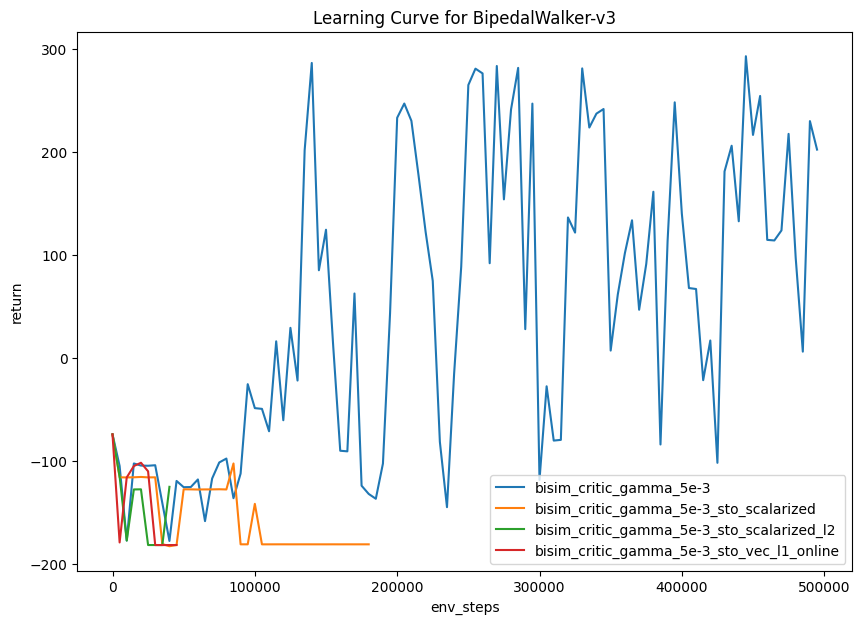

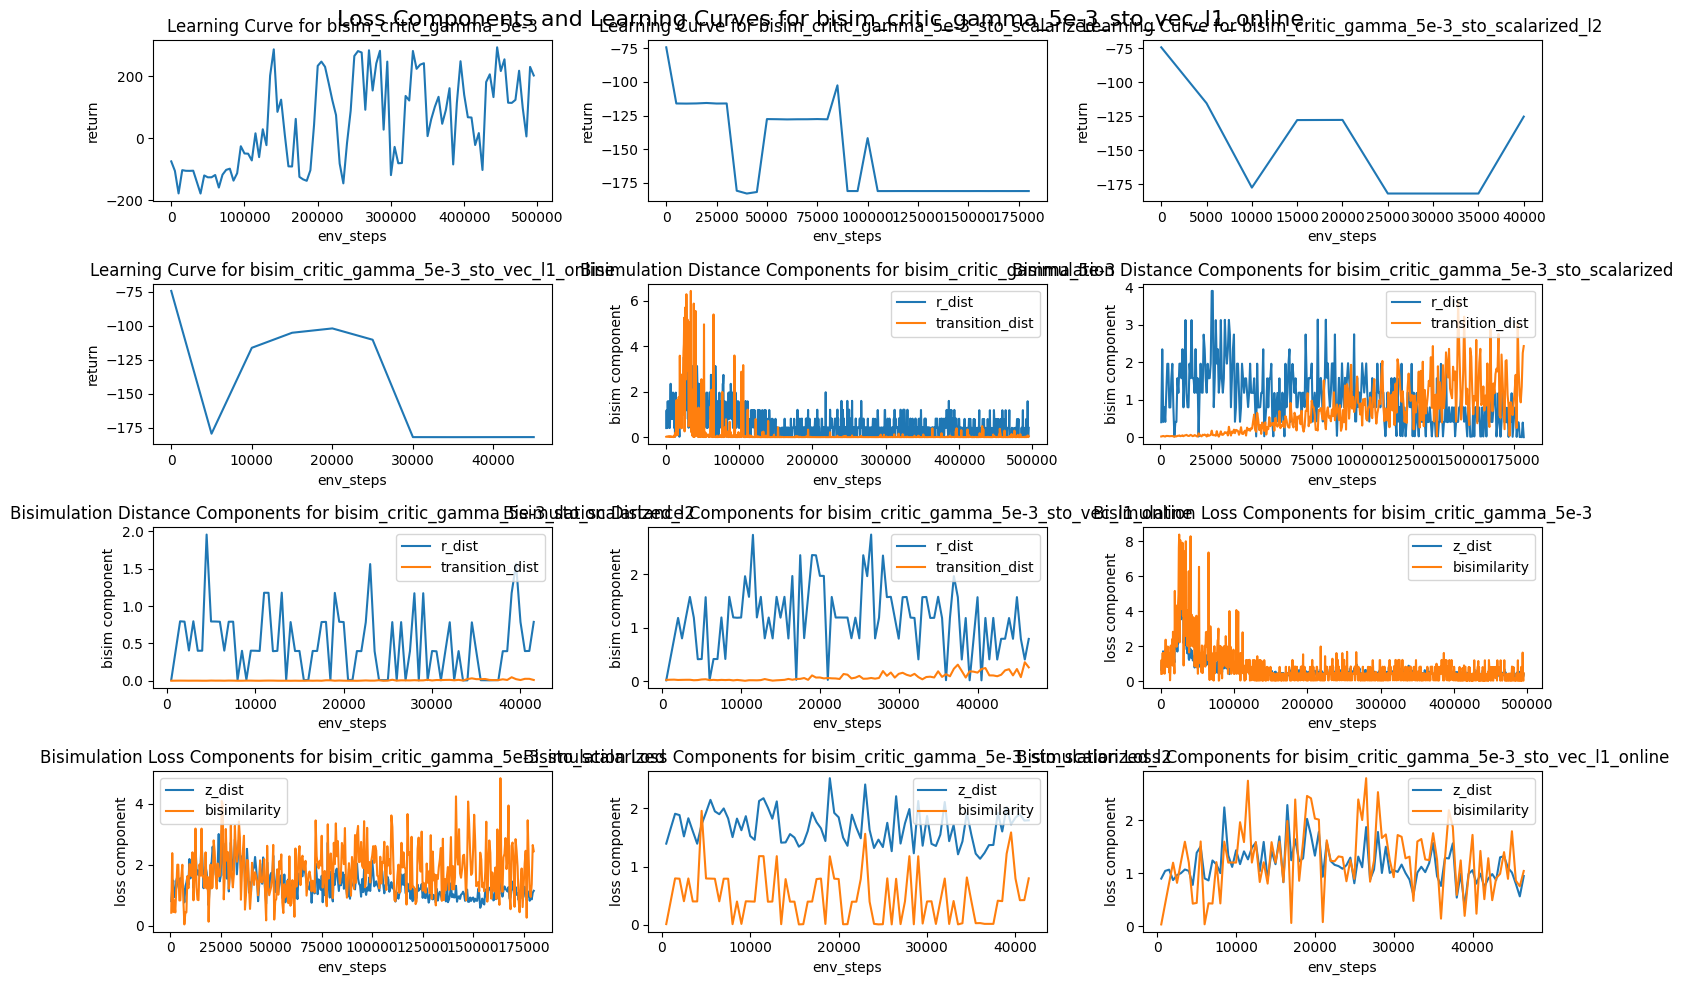

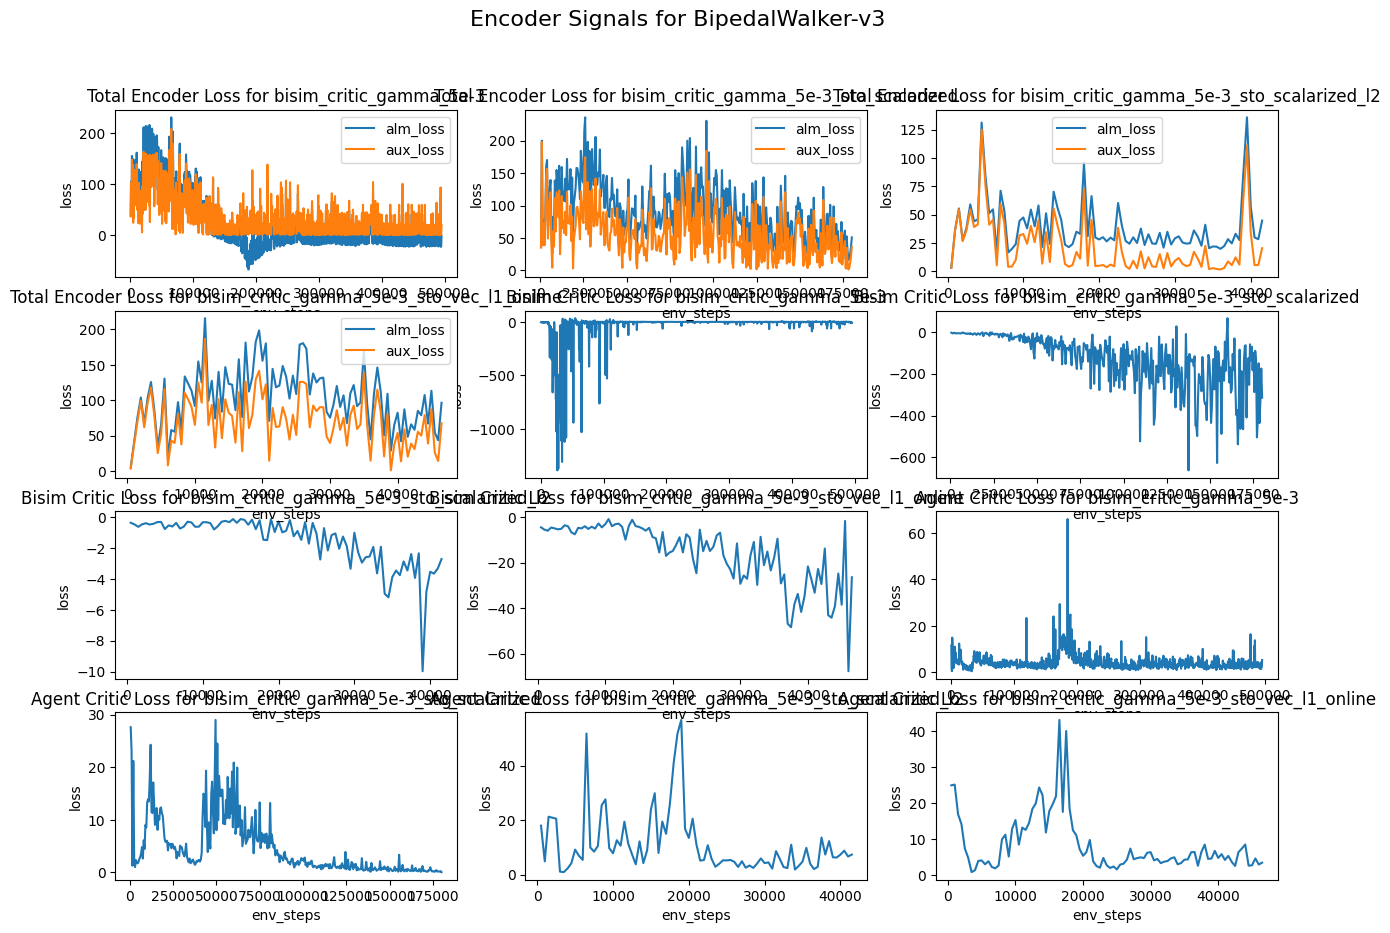

In [3]:
bipedalwalker_datasets = OrderedDict(
    [
        # (
        #     "bisim_critic_15",
        #     Path("./logs/BipedalWalker-v3/2024-10-10-12-54-00+34348-34348/"),
        # ),
        # (
        #     "bisim_critic_challenger",
        #     Path("./logs/BipedalWalker-v3/2024-10-11-23-32-24+54874-54874/"),
        # ),
        (
            "bisim_critic_gamma_5e-3",
            Path("./logs/BipedalWalker-v3/2024-10-12-11-23-24+69174-69174/"),
        ),
        # (
        #     "bisim_critic_gamma_5e-3_det",
        #     Path("./logs/BipedalWalker-v3/2024-10-12-22-11-42+81855-81855/"),
        # ),
        # (
        #     "bisim_critic_gamma_5e-3_det_scalarized",
        #     Path("./logs/BipedalWalker-v3/2024-10-13-09-11-48+92850-92850/"),
        # ),
        # (
        #     "bisim_critic_gamma_5e-3_sto_scalarized",
        #     Path("./logs/BipedalWalker-v3/2024-10-13-17-58-53+614099-614099/"),
        # ),
        (
            "bisim_critic_gamma_5e-3_sto_scalarized_l2",
            Path("./logs/BipedalWalker-v3/2024-10-13-21-03-20+13823-13823/"),
        ),
        (
            "bisim_critic_gamma_5e-3_sto_vec_l1_online",
            Path("./logs/BipedalWalker-v3/2024-10-13-21-38-31+15579-15579/"),
        ),
    ]
)

plot_learning_curves(bipedalwalker_datasets, "BipedalWalker-v3")
plot_loss_and_learning_curves(bipedalwalker_datasets, "BipedalWalker-v3")
plot_encoder_signals(bipedalwalker_datasets, "BipedalWalker-v3")

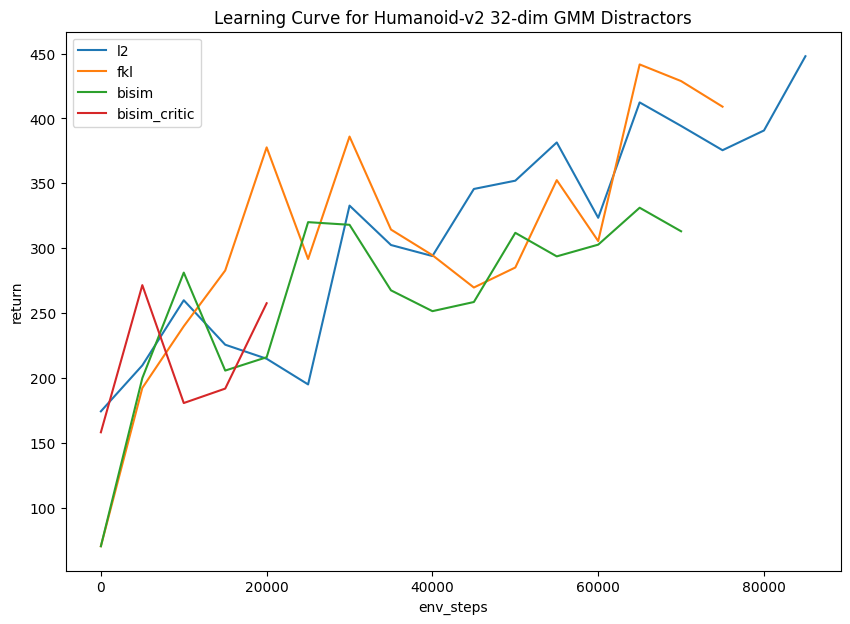

In [4]:
humanoid_datasets = OrderedDict(
    [
        (
            "l2",
            Path("./logs/Humanoid-v2-d32/2024-10-10-00-05-20+12467-12467"),
        ),
        (
            "fkl",
            Path("./logs/Humanoid-v2-d32/2024-10-10-00-04-13+10923-10923"),
        ),
        (
            "bisim",
            Path("./logs/Humanoid-v2-d32/2024-10-10-00-04-24+10982-10982"),
        ),
        (
            "bisim_critic",
            Path("./logs/Humanoid-v2-d32/2024-10-10-00-05-00+11755-11755"),
        ),
    ]
)

plot_learning_curves(humanoid_datasets, "Humanoid-v2 32-dim GMM Distractors")

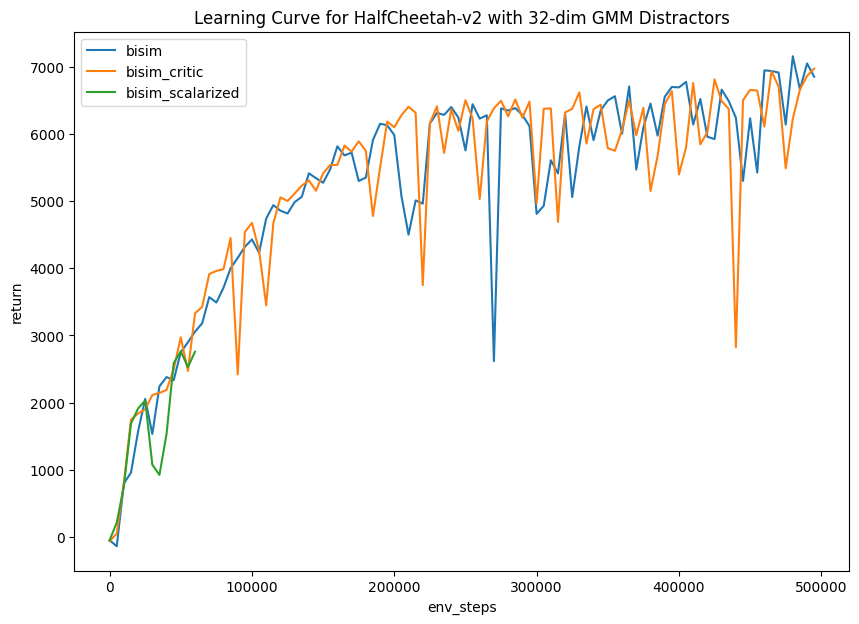

In [5]:
halfcheetah_datasets = OrderedDict(
    [
        # (
        #     "l2",
        #     Path("./logs/HalfCheetah-v2-d32/2024-10-09-14-50-30+1930320-1930320"),
        # ),
        # (
        #     "fkl",
        #     Path("./logs/HalfCheetah-v2-d32/2024-10-09-14-48-19+1926785-1926785"),
        # ),
        # (
        #     "rkl",
        #     Path("./logs/HalfCheetah-v2-d32/2024-10-09-14-50-12+1929748-1929748"),
        # ),
        (
            "bisim",
            Path("./logs/HalfCheetah-v2-d32/2024-10-09-14-48-21+1926890-1926890"),
        ),
        (
            "bisim_critic",
            Path("./logs/HalfCheetah-v2-d32/2024-10-09-17-47-38+27493-27493"),
        ),
        (
            "bisim_scalarized",
            Path("./logs/HalfCheetah-v2-d32/2024-10-13-22-05-12+19036-19036/"),
        ),
    ]
)

plot_learning_curves(halfcheetah_datasets, "HalfCheetah-v2 with 32-dim GMM Distractors")

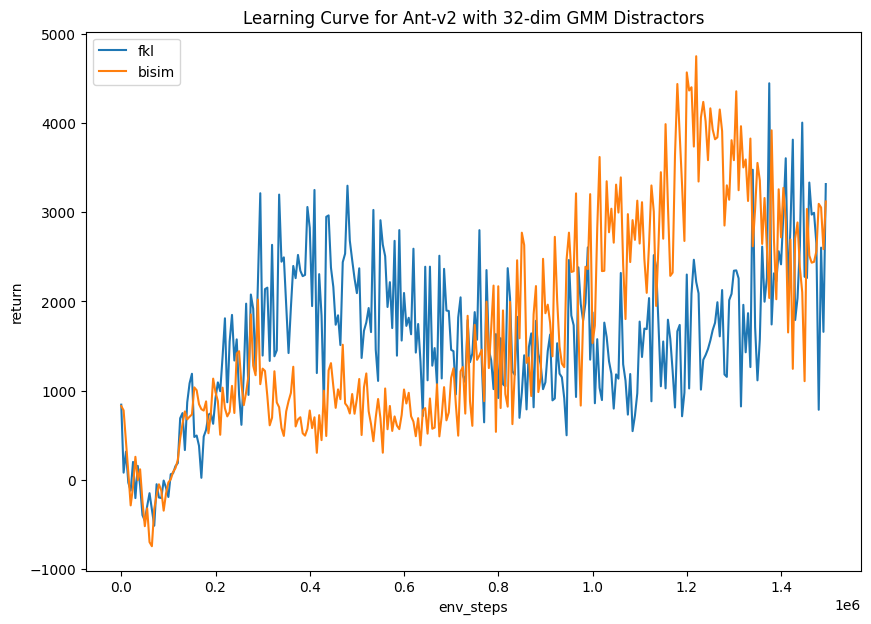

In [6]:
ant_datasets = OrderedDict(
    [
        ("fkl", Path("logs/Ant-v2-d32/2024-10-08-14-37-29+5513-5513")),
        ("bisim", Path("logs/Ant-v2-d32/2024-10-08-14-37-48+6123-6123")),
    ]
)

plot_learning_curves(ant_datasets, "Ant-v2 with 32-dim GMM Distractors")